##  Загрузка и подготовка к анализу данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

Подготовим к анализу данные /datasets/hypothesis.csv

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
display(hypothesis.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Переведем название столбцов к одному регистру

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
print(hypothesis) # проверили результат

                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


Визуально можно увидеть, что дупликатов в данной таблице нет и с ней можно начинать работать.
Далее для дальнейшей работы подготовим к анализу таблицы /datasets/orders.csv и /datasets/visitors.csv

In [6]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [7]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Приведем названи я столбцов к нижнему регистру

In [8]:
orders.columns = orders.columns.str.lower()

In [9]:
display(orders.head(5))

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим файл на дупликаты и пропущенные значения.

In [10]:
orders.duplicated().sum()

0

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date']) 

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Таблица orders готова к анализу.

In [14]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [15]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors['date'] = pd.to_datetime(visitors['date']) 

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим файл на дупликаты и пропущенные значения.

In [18]:
visitors.duplicated().sum()

0

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таблица visitors готова к анализу.

В данной части были подготовленны данные к анализу, а именно: приведены к нижнему регистру названия столбцов, выпонена проверка на наличие дупликатов и пропусков, изменен тип данных под подходящий нам. Необходимые файлы готовы к проведению исследования.

## Приоритизация гипотез

У нас имеется 9 гипотез, которые мы приоритезируем двумя методами: 'ICE' и 'RICE'

In [20]:
pd.set_option('display.max_colwidth', None)

In [21]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE для приоритизации гипотез.

Приоритезируем имеющиеся гипотезы с помощью фреймворка 'ICE'

Создадим столбец 'ice', где сохраним уровень приоритета каждой из гипотезы, округленные до 2 знака после запятой.

In [22]:
hypothesis['ice'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

Выведем столбцы 'hypothesis' и 'ice' отсортированные по столбцу 'ice' в порядке убывания значения.

In [23]:
hypothesis.loc[:, ['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Как видим, данный метод выделяет 3 наиболее приоритетные гипотезы, а именно: запустить акцию, дающую скидку на товар в день рождения; добавление два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; добавление форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Исходя из данного метода именно эти гипотезы стоит тестировать, а от остальных придется отказаться.

### Применение фреймворка RICE для приоритизации гипотез.

Приоритезируем имеющиеся гипотезы с помощью фреймворка 'RICE'

Создадим столбец 'rice', где сохраним уровень приоритета каждой из гипотезы, округленные до 2 знака после запятой.

In [24]:
hypothesis['rice'] = round(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)

Выведем столбцы 'hypothesis' и 'rice' отсортированные по столбцу 'rice' в порядке убывания значения.

In [25]:
hypothesis.loc[:, ['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Как видим, данный метод выделяет 4 наиболее приоритетные гипотезы, а именно: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа; добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. Исходя из данного метода именно эти гипотезы стоит тестировать, а от остальных придется отказаться.

Оценивая методы приоритезации 'ICE' и 'RICE', применимо к нашему исследованию, уровень значимости гипотез между ними отличется. В методе 'ICE' имеются 3 явных лидера с гипотезами: запустить акцию, дающую скидку на товар в день рождения; добавление два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; добавление форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. В 'RICE' отчетливо прослеживается 4 лидера значимости: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа; добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. Так произошло из-за того, что метод 'ICE', в отличии от метода 'RICE' не учитывает то, как много пользователей он затронет. Показатель 'rich' в гипотезах, которые в методе 'RICE' наиболее значимы, выше, чем в других гипотезах, что и увеличило их показаель.

## Анализ A/B-теста

### Изучение и корректировка данных для A/B-теста

Для начала узнаем, сколько у нас групп учавствуют в A/B-тесте и какие это группы.

In [26]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Как видим у нас 2 исследуемые группы.

Теперь узнаем дату начала проведения теста и его конец.

In [27]:
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


Как видим, датой начала теста является 2019-08-01, а конечная дата 2019-08-31.

Так как попавший в одну из групп пользователь должен остаться в этой группе до конца теста, перед началом проведения A/B-теста проверим, есть ли пользователи, которые попали сразу в обе исследуемые группы. 

Для начала выделим отдельно пользователей обеих групп. 

In [28]:
orders_a = orders.loc[orders['group'] == 'A', ['visitorid', 'group']].reset_index(drop=True) # Пользователи группы А

In [29]:
orders_b = orders.loc[orders['group'] == 'B', ['visitorid', 'group']].reset_index(drop=True) # Пользователи группы В

In [30]:
orders_ad = orders_a.merge(orders_b, on='visitorid') # объеденим данные по 'visitorid', чтобы остались 
                                                     # идентификаторы пользователей, которые есть в обеих группах

In [31]:
orders_ad.head(5) # просмотрели результат

,visitorid,group_x,group_y
0,4069496402,A,B
1,199603092,A,B
2,199603092,A,B
3,199603092,A,B
4,199603092,A,B


Сохраним новое значение orders, в которой будут отображены сведения о покупках пользователей, которые относятся только к одной группе исследуемых.

In [32]:
orders = orders[np.logical_not(orders['visitorid'].isin(orders_ad['visitorid']))]    

In [33]:
orders.reset_index(drop=True)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


Теперь мы получили более корректные данные о покупках, которые мы будем использовать в дальнейшем.

Теперь узнаем, сколько пользователей в каждой исследуемой группе.

In [34]:
orders_a1 = orders.loc[orders['group'] == 'A', ['visitorid']].reset_index(drop=True)

In [35]:
orders_b1 = orders.loc[orders['group'] == 'B', ['visitorid']].reset_index(drop=True)

In [36]:
orders_a1.nunique() # выведем число уникальных пользователей в группе А

visitorid    445
dtype: int64

In [37]:
orders_b1.nunique()# выведем число уникальных пользователей в группе В

visitorid    528
dtype: int64

Как видим, число пользователей, с учетом отсеивания, в группе А составляет 445, а в группе В составляет 528.

Перед началов проведения A/B-теста было выявлено, что в тесте участвуют 2 группы, а именно: А и В. Датой начала теста является 2019-08-01, а его завершения 2019-08-31. В данных были обнаружены пользователи, которые присутствовали в обеих группах, после чего они были удалены, так как могли сказаться на результате теста. С учетом данного отсеивания в группе А осталось 445 пользователя, а в группе В 528.

### Построим график кумулятивной выручки по группам.

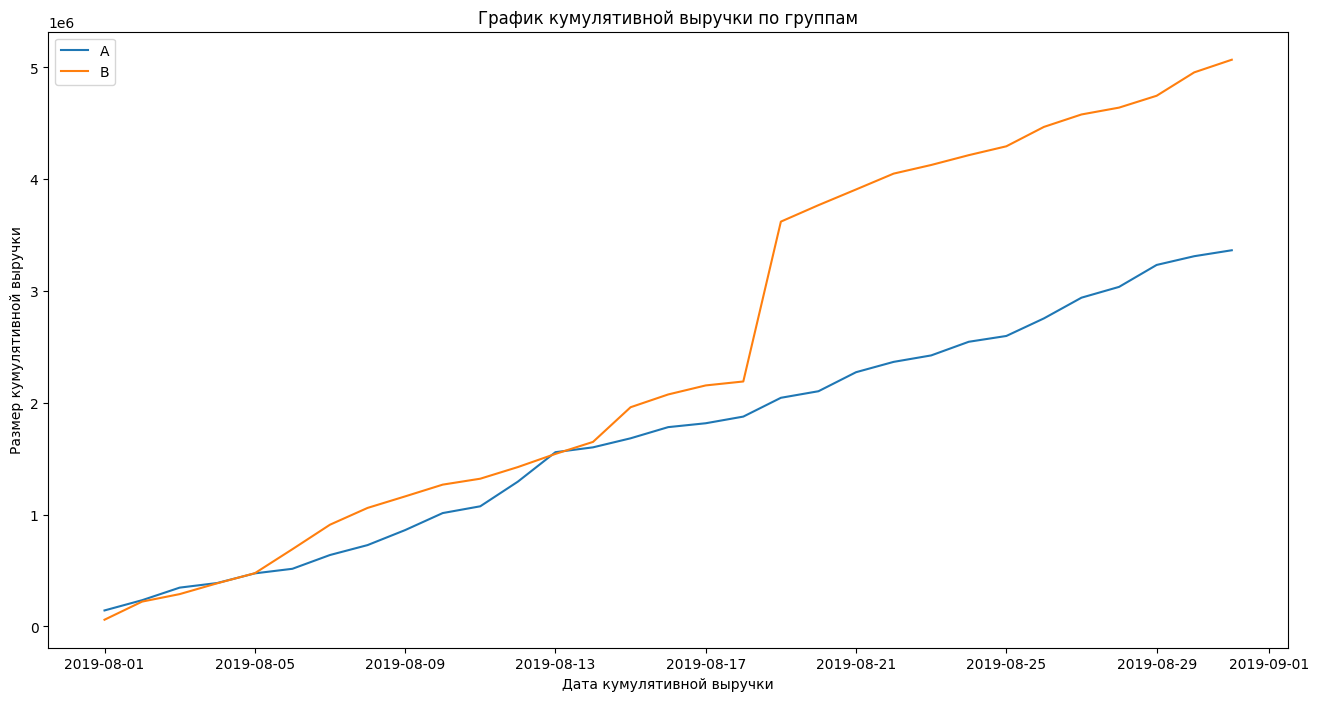

In [38]:
register_matplotlib_converters()


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата кумулятивной выручки')
plt.ylabel('Размер кумулятивной выручки')
plt.title('График кумулятивной выручки по группам')
plt.legend();

В середине графика кумулятивной выручки, группа В резко вышла вперед, хотя оставалась примерно на одном уровне с группой А. Возможно влияние аномальных значений в области увеличения суммы заказа либо резкого увеличения количества заказов. По данному графику нельзя сделать какие то определенные выводы, необходим дальнейший анализ.

### Построим график кумулятивного среднего чека по группам.

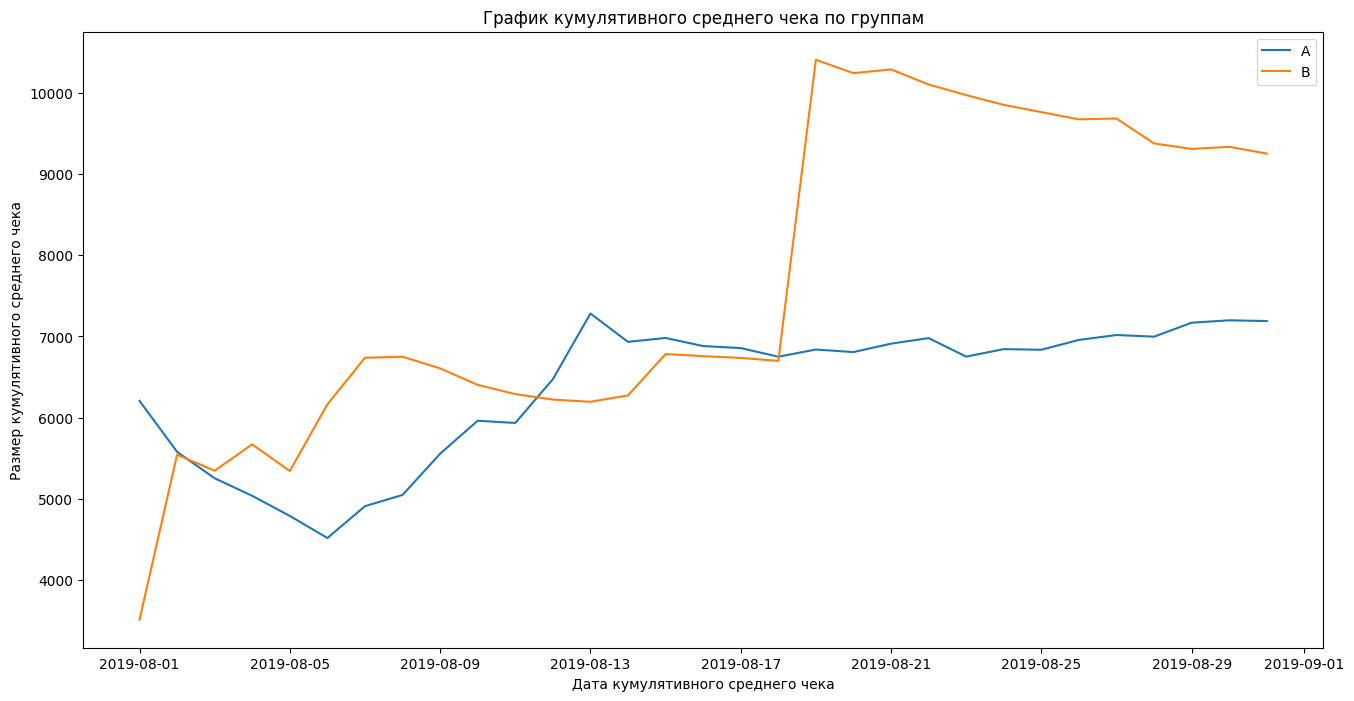

In [39]:
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата кумулятивного среднего чека')
plt.ylabel('Размер кумулятивного среднего чека')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

По графику кумулятивного среднего чека по группам опять прослеживается резкое колебание среднего чека в группе В, что так же говорит о возможном влиянии аномальных значений. Так же можно заметить, что к концу теста, значение кумулятивного среднего чека в группе А стабилизировалось, а в группе В проискодит стабильное падение величины среднегоо чека.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

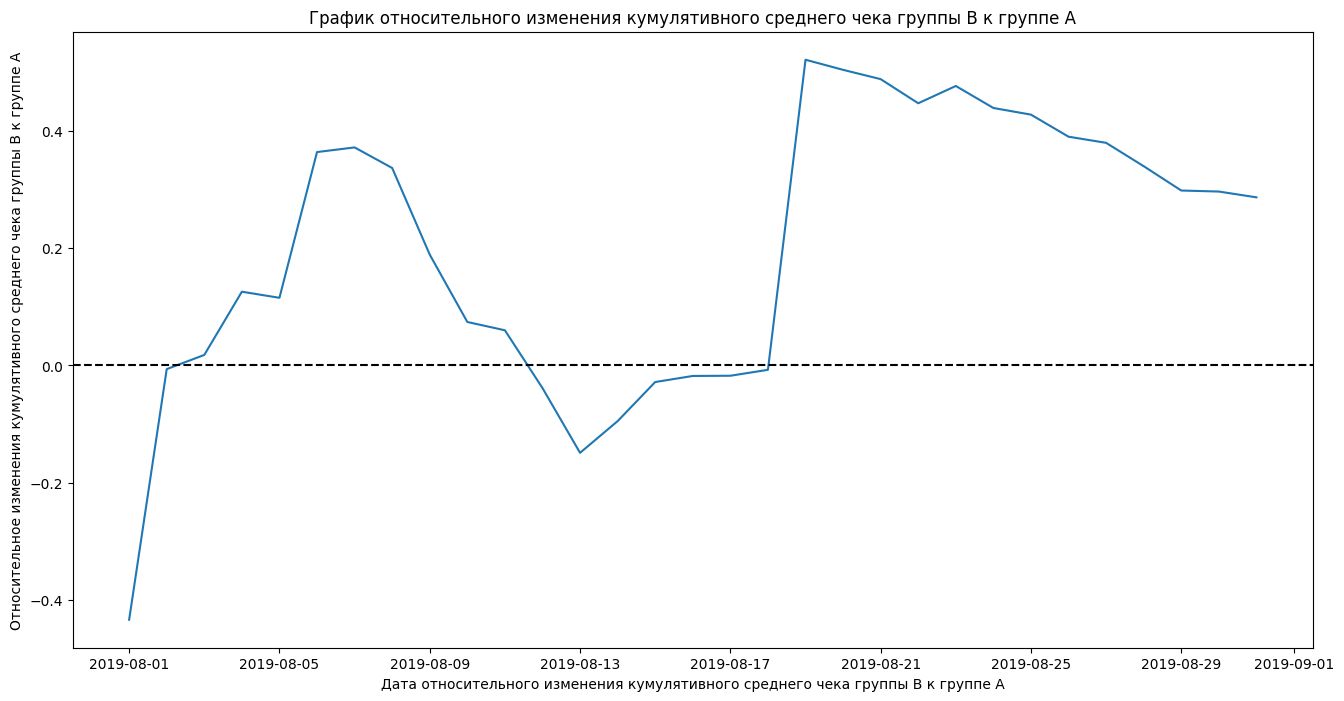

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Как видим, результаты значительно менялись в нескольких датах, скорее всего именно в эти периоды были сделаны аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

Создадим переменные cumulativevisitorsA и cumulativevisitorsB, в которых сохраним даты, комулятнывное значение посещений и кумулятивное значение заказов по группам.

In [41]:
cumulativevisitorsA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativevisitorsB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

Строим график кумулятивного среднего количества заказов на посетителя по группам.

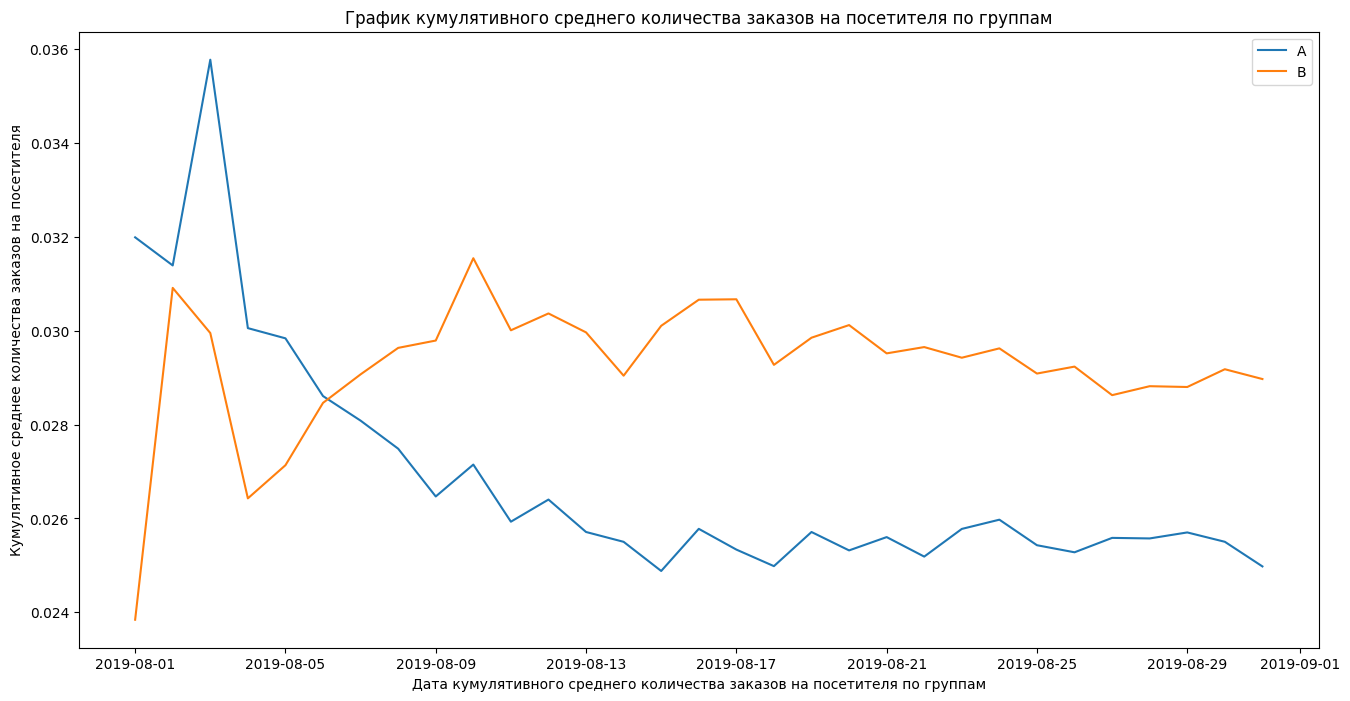

In [42]:
plt.figure(figsize=(16,8))
plt.plot(cumulativevisitorsA['date'], cumulativevisitorsA['orders']/cumulativevisitorsA['visitors'], label='A')
plt.plot(cumulativevisitorsB['date'], cumulativevisitorsB['orders']/cumulativevisitorsB['visitors'], label='B')
plt.xlabel('Дата кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количества заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

Как видим, значение группы А стабилизировалось к концу графика как и группы В. Можно отметить, что кумулятивное среднее количество заказов на посетителя в группе В существенно выше.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Создадим переменную mergedCumulativeVisitors, где сохраним даты и данные по заказам и посещениям пользователей.

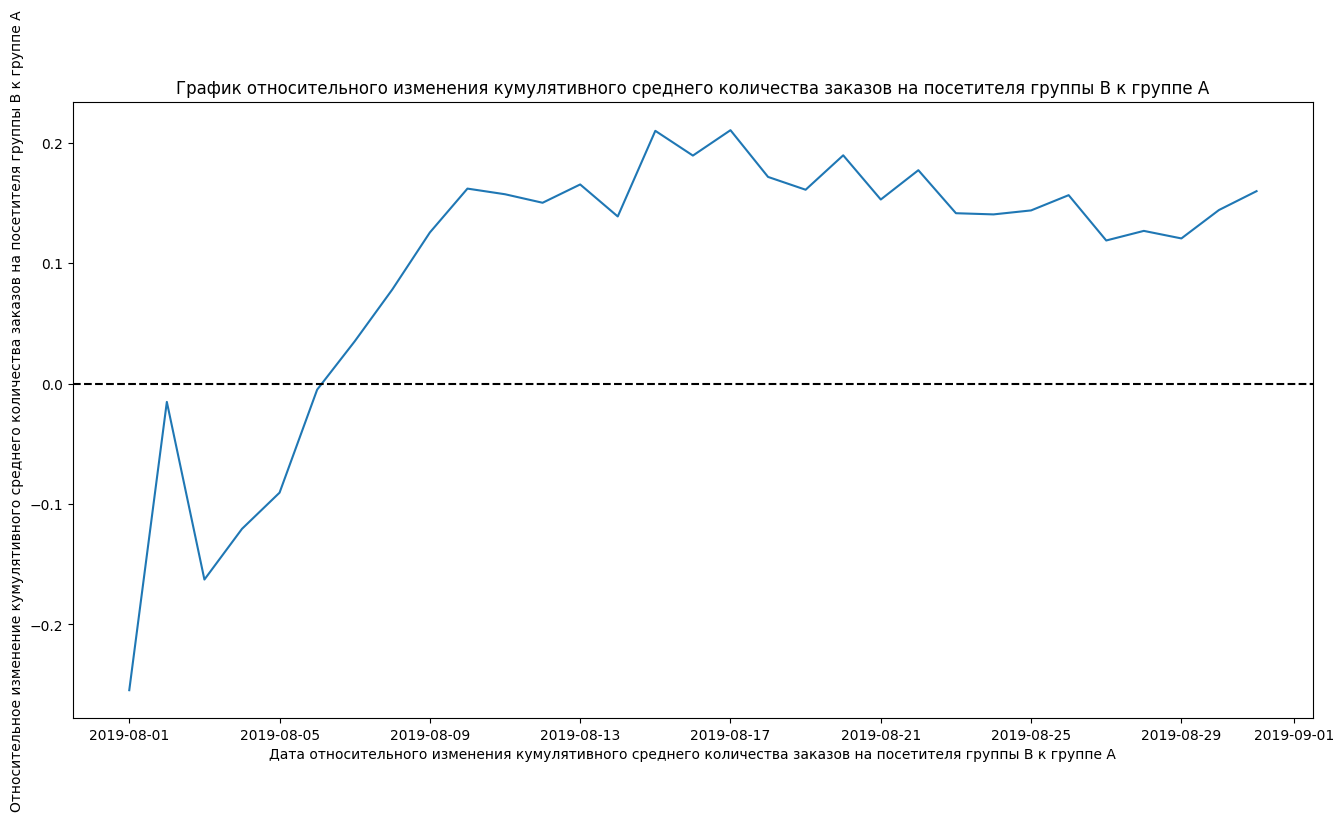

In [43]:
mergedCumulativeVisitors = cumulativevisitorsA.merge(cumulativevisitorsB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeVisitors['date'], (mergedCumulativeVisitors['ordersB']/mergedCumulativeVisitors['visitorsB'])/
         (mergedCumulativeVisitors['ordersA']/mergedCumulativeVisitors['visitorsA'])-1)
plt.xlabel('Дата относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Как видим, среденне значение количества заказов в группе В постоянно росло относительно группы А. К концу графика отношение значения В к А стабилизировалось.

### Построим точечный график количества заказов по пользователям.

Введем перемнную ordersByUsers для построения точечного графика количества заказов по пользователям, в котором будут значения идентификаторов пользователей и количество их заказов за изучаемый период. 

In [44]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'orders']

Построим точечный график.

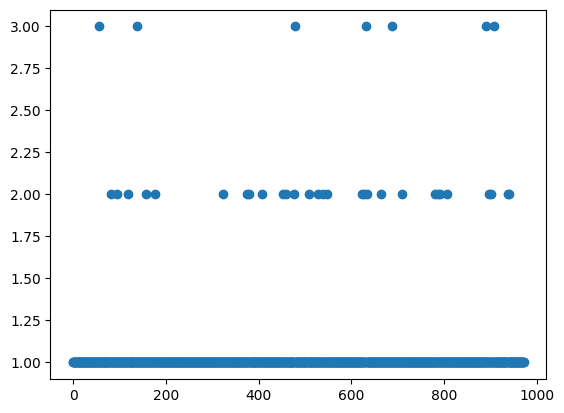

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);

Как видим, подавляющая масса пользователей совершают одну покупку за изучаемый период. Две покупки совершают намного меньше, а три покупки большая редкость.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [46]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Посчитав перцентили количества заказов на пользователя, можно сделать выводы, что только 5% пользователей сделали более одного заказа за изучаемый период и только 1% сделал более 2 заказов. Границей аномальных пользователей будет две покупки за изучаемый период.

### Построим точечный график стоимостей заказов. 

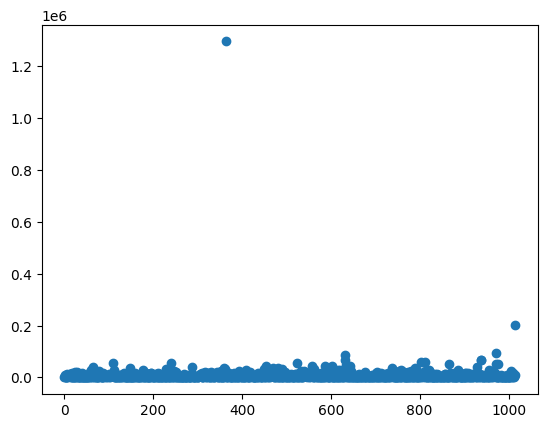

In [47]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Как видим из графика, стоимость заказов распределена давольно равномерно, но имеются аномалии с очень большой величиной, которые могли повлиять как на величину среднего чека так и на изменение величины выручки за изучаемый период.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [48]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Исходя из полученных расчетов, заказы на сумму более 26785 рублей составляют 5% от всех заказов за изучаемый период и только 1% сделал заказ на сумму больше 53904. Границей аномальных пользователей будет одна покупка на сумму более 53904 рублей. 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Так же найдём относительные различия в среднем чеке между группами. Подготовим данные для расчета статистической значимости

In [49]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] # количество пользователей в выбранную дату в группе A
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
) # выведем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] 

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']] # количество пользователей в выбранную дату в группе B
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
) # выведем количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
) # количество заказов в выбранную дату в группе A и суммарная выручка в выбранную дату в группе A
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date']) # суммарное число заказов до выбранной даты включительно в группе A и суммарная выручка 
                           # до выбранной даты включительно в группе A
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
) # количество заказов в выбранную дату в группе B и суммарная выручка в выбранную дату в группе B
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date']) # суммарное число заказов до выбранной даты включительно в группе B и суммарная выручка 
                           # до выбранной даты включительно в группе B
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) # Проверили результат

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

In [50]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = ' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('различие между группами = ' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
различие между группами = 0.160


По «сырым» данным имеются различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выйгрыш группы B равен 16% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами.  Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. Так же найдём относительные различия в среднем чеке между группами.

In [51]:
print('p-value = ' '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('различие между группами = ' '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
различие между группами = 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее было выявлено, что 1% пользоватлей совершают более двух покупок. Так же было выявлено, что только 1% пользователей совершают покупку на сумму более 53904 за исследуемый нами период. Примем за аномальные значения пользователей, которые совершили более двух покупок или сумма покупки более 53904.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) # Узнаем, сколько всего аномальных пользователей атрибутом

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorid, dtype: int64
16


Узнаем, сильно ли повлияют исключение данных пользователей в «очищенных» данных. Для начала узнаем, сколько уникальных пользователей файле orders.

In [53]:
orders['visitorid'].nunique()

973

Анализируя данные видим, что количество отсеянных 'аномальных' пользователей составляет примерно 1.64%, что не превышает допустимый предел в 10%. Можем приступать к анализу.

In [54]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [55]:
print('p-value = ' '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие между группами = ' '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.007
различие между группами = 0.189


Результаты по среднему количеству заказов по «очищенным» данным практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [56]:
print('p-value = ' 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('различие между группами = '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.788
различие между группами = -0.032


P-value уменьшился, как и разница между сегментами сократилась с 29% до 3%. На основе «очищенных» данных гипотезу об отсутствии различий в среднем чеке между группами отклонить не можем. 

### Построим график кумулятивного среднего чека по группам по «очищенным» данным.

Так как ранее наблюдалось небольшое, но стабильное снижение величины кумулятивного среднего чека в группе В, можем предположить, что на это снижение повлияли аномальные значения, которые были ранее. Построим график кумулятивного среднего чека по группам по «очищенным» данным, чтобы убедиться, что данная величина для группы В стабилизировалась.

In [57]:
orders_new = orders[np.logical_not(orders['visitorid'].isin(abnormalUsers))]  

In [58]:
datesGroups = orders_new[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x:orders_new[
        np.logical_and(
            orders_new['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

C:\Users\HP-work\AppData\Local\Temp\ipykernel_1632\624250681.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambda x:orders_new[


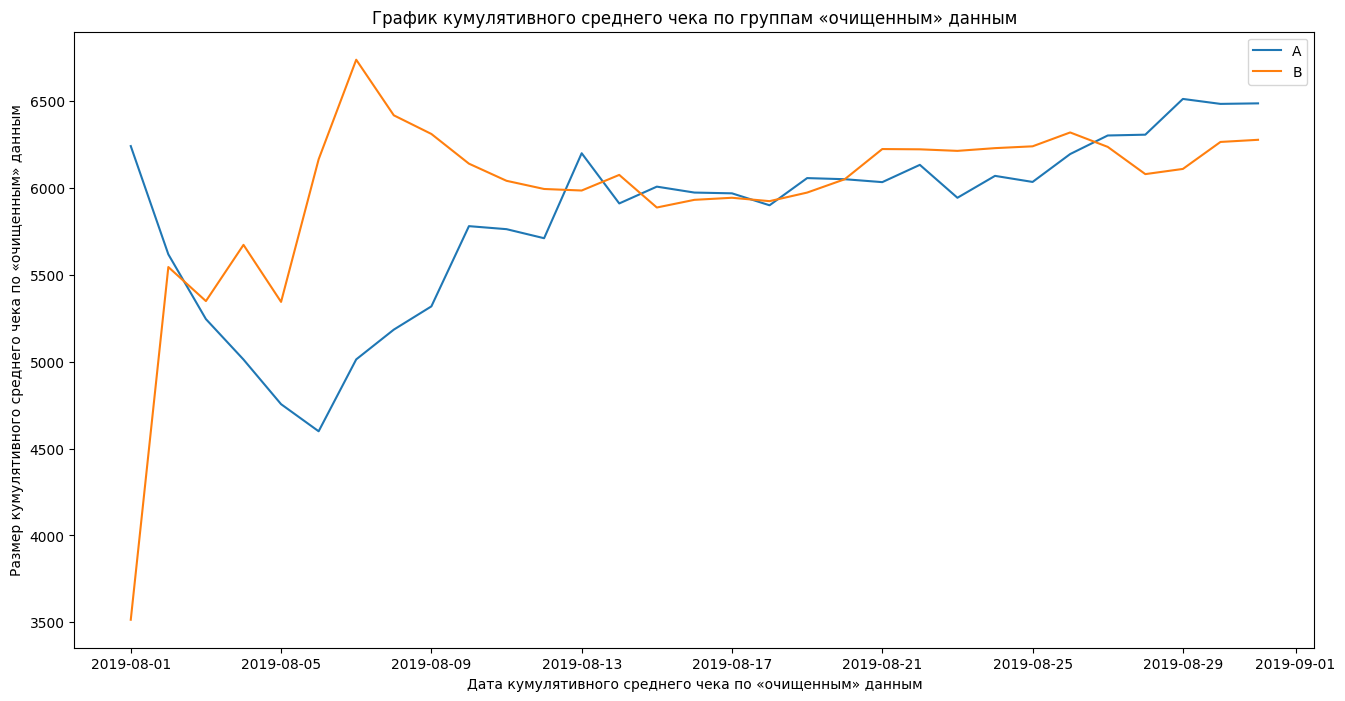

In [59]:
plt.figure(figsize=(16,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата кумулятивного среднего чека по «очищенным» данным')
plt.ylabel('Размер кумулятивного среднего чека по «очищенным» данным')
plt.title('График кумулятивного среднего чека по группам «очищенным» данным')
plt.legend();

Как видим, по «очищенным» данным, значение кумулятивного среднего чека в обеих группах стабилизировалось и находится примерно на одном уровне.

### Примем  решение по результатам теста и объясним его.

Факты, которые были получены в результате исследования:  
* Значение кумулятивного среднего количества заказов на посетителя группы А стабилизировалось к концу графика как и группы В. Можно отметить, что кумулятивное среднее количество заказов на посетителя в группе В существенно выше.  
* Значение кумулятивного среднего чека в обеих группах стабилизировалось к концу теста и находятся примерно на одном уровне.  
* Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа В показала увеличение среднего количества заказов на посетителя и в тоже время имеет примерно одинаковый показатель кумулятивного среднего чека с группой А основываясь на графике кумулятивного среднего чека по группам по «очищенным» данным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.

__В данном разделе были сделаны следующие выводы:__  
* Перед началов проведения A/B-теста было выявлено, что в тесте участвуют 2 группы, а именно: А и В. Датой начала теста является 2019-08-01, а его завершения 2019-08-31. В данных были обнаружены пользователи, которые присутствовали в обеих группах, после чего они были удалены, так как могли сказаться на результате теста. С учетом данного отсеивания в группе А осталось 445 пользователя, а в группе В 528. 
* По графику кумулятивной выручки, группа В резко вышла вперед, хотя оставалась значительное время примерно на одном уровне с группой А. Возможно влияние аномальных значений. По данному графику нельзя сделать какие то определенные выводы, так как число пользователей в группе В больше, что в свою очередь может сказываться на размер кумулятивной выручки. 
* По графику кумулятивного среднего чека по группам опять прослеживается резкое колебание среднего чека в группе В, что так же говорит о возможном влиянии аномальных значений. Так же можно заметить, что к концу теста, значение кумулятивного среднего чека в группе А стабилизировалось, а в группе В проискодит стабильное падение величины среднего чека. 
* По графику относительного изменения кумулятивного среднего чека группы B к группе A видно, что результаты значительно менялись в нескольких датах, скорее всего именно в эти периоды были сделаны аномальные заказы. 
* По графику кумулятивного среднего количества заказов на посетителя по группам видно, что значение группы А стабилизировалось к концу графика как и группы В. Можно отметить, что кумулятивное среднее количество заказов на посетителя в группе В существенно выше. 
* По графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A видно, что среденне значение количества заказов в группе В постоянно росло относительно группы А. К концу графика отношение значения В к А стабилизировалось. 
* По точечному графику количества заказов по пользователям видим, подавляющая масса пользователей совершают одну покупку за изучаемый период. Две покупки совершают намного меньше, а три покупки большая редкость. 
* По точечному графику стоимостей заказов видим, стоимость заказов распределена давольно равномерно, но имеются аномалии с очень большой величиной, которые могли повлиять как на величину среднего чека так и на изменение величины выручки за изучаемый период.
* Посчитав перцентили количества заказов на пользователя, можно сделать выводы, что только 5% пользователей сделали более одного заказа за изучаемый период, а более 2 заказов около 1%. Границей аномальных пользователей будет две покупки за изучаемый период.
* Исходя из полученных расчетов, заказы на сумму более 53904 рублей составляют 1% от всех заказов за изучаемый период.
* Сформулированы гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. 
* По «сырым» данным имеются различия в среднем числе заказов групп A и B. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако, относительный выйгрыш группы B равен 16% — второе число в выводе.
* Сформулированы гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
* P-value равен 0.829, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу, а именно считать, что в среднем чеке есть различия, нет.
* Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным практически не изменилась относительно «сырых» данных.
* P-value уменьшился и составил 0.788, как и разница между сегментами сократилась с 29% до 3%. На основе «очищенных» данных гипотезу об отсутствии различий в среднем чеке между группами отклонить так же не можем.
* при постоении графика, по «очищенным» данным, значение кумулятивного среднего чека в обеих группах стабилизировалось и находится примерно на одном уровне.
* Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа В показала увеличение среднего количества заказов на посетителя и в тоже время имеет примерно одинаковый показатель кумулятивного среднего чека с группой А основываясь на графике кумулятивного среднего чека по группам по «очищенным» данным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.

## Общий вывод

__Выполняя проект, были проделаны следующие работы:__  
1. Загрузка и подготовка к анализу данных.
2. Выполнена приоритизация гипотез фреймворками RICE и ICE.
3. Проведен анализ A/B-теста, а именно:  
* Изучены и скорректированы данные для A/B-теста.  
* Построен график кумулятивной выручки по группам.  
* Постройте график кумулятивного среднего чека по группам.
* Построен график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построен график кумулятивного среднего количества заказов на посетителя по группам.
* Построен график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
* Постройте точечный график количества заказов по пользователям.
* Посчитаны 95-й и 99-й перцентили количества заказов на пользователя. Выбераны границы для определения аномальных пользователей.
* Построены точечный график стоимостей заказов. 
* Посчитаны 95-й и 99-й перцентили стоимости заказов. Выбераны границы для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
* Построен график кумулятивного среднего чека по группам по «очищенным» данным.
* Принято решение по результатам теста.

__Выполняя проект, были сделаны следующие выводы:__    
1. Оценивая методы приоритезации 'ICE' и 'RICE', применимо к нашему исследованию, уровень значимости гипотез между ними отличется. В методе 'ICE' имеются 3 явных лидера с гипотезами: запустить акцию, дающую скидку на товар в день рождения; добавление два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; добавление форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. В 'RICE' отчетливо прослеживается 4 лидера значимости: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа; добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. Так произошло из-за того, что метод 'ICE', в отличии от метода 'RICE' не учитывает то, как много пользователей он затронет. Показатель 'rich' в гипотезах, которые в методе 'RICE' наиболее значимы, выше, чем в других гипотезах, что и увеличило их показаель.
2. Перед началов проведения A/B-теста было выявлено, что в тесте участвуют 2 группы, а именно: А и В. Датой начала теста является 2019-08-01, а его завершения 2019-08-31. В данных были обнаружены пользователи, которые присутствовали в обеих группах, после чего они были удалены, так как могли сказаться на результате теста. С учетом данного отсеивания в группе А осталось 445 пользователя, а в группе В 528.
3. По графику кумулятивной выручки, группа В резко вышла вперед, хотя оставалась значительное время примерно на одном уровне с группой А. Возможно влияние аномальных значений. По данному графику нельзя сделать какие то определенные выводы, так как число пользователей в группе В больше, что в свою очередь может сказываться на размер кумулятивной выручки.
4. По графику кумулятивного среднего чека по группам опять прослеживается резкое колебание среднего чека в группе В, что так же говорит о возможном влиянии аномальных значений. Так же можно заметить, что к концу теста, значение кумулятивного среднего чека в группе А стабилизировалось, а в группе В проискодит стабильное падение величины среднегоо чека.
5. По графику относительного изменения кумулятивного среднего чека группы B к группе A видно, что результаты значительно менялись в нескольких датах, скорее всего именно в эти периоды были сделаны аномальные заказы.
6. По графику кумулятивного среднего количества заказов на посетителя по группам видно, что значение группы А стабилизировалось к концу графика как и группы В. Можно отметить, что кумулятивное среднее количество заказов на посетителя в группе В существенно выше.
7. По графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A видно, что среденне значение количества заказов в группе В постоянно росло относительно группы А. К концу графика отношение значения В к А стабилизировалось.
8. По точечному графику количества заказов по пользователям видим, подавляющая масса пользователей совершают одну покупку за изучаемый период. Две покупки совершают намного меньше, а три покупки большая редкость.
9. По точечному графику стоимостей заказов видим, стоимость заказов распределена давольно равномерно, но имеются аномалии с очень большой величиной, которые могли повлиять как на величину среднего чека так и на изменение величины выручки за изучаемый период.
10. Посчитав перцентили количества заказов на пользователя, можно сделать выводы, что только 5% пользователей сделали более одного заказа за изучаемый период. Границей аномальных пользователей будет одна покупка за изучаемый период.
11. Исходя из полученных расчетов, заказы на сумму более 26785 рублей составляют 5% от всех заказов за изучаемый период.
12. Сформулированы гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. 
13. По «сырым» данным имеются различия в среднем числе заказов групп A и B. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако, относительный выйгрыш группы B равен 16% — второе число в выводе.
14. Сформулированы гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
15. P-value равен 0.829, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу, а именно считать, что в среднем чеке есть различия, нет.
16. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным практически не изменилась относительно «сырых» данных.
17. P-value уменьшился и составил 0.788, как и разница между сегментами сократилась с 29% до 3%. На основе «очищенных» данных гипотезу об отсутствии различий в среднем чеке между группами отклонить так же не можем.
18. при постоении графика, по «очищенным» данным, значение кумулятивного среднего чека в обеих группах стабилизировалось и находится примерно на одном уровне.
19. Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа В показала увеличение среднего количества заказов на посетителя и в тоже время имеет примерно одинаковый показатель кумулятивного среднего чека с группой А основываясь на графике кумулятивного среднего чека по группам по «очищенным» данным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.